# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')
print(df)

         Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(baby_names.info)
print(baby_names.dtypes)

<bound method DataFrame.info of          Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]>
Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
baby_names[:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [5]:
baby_names =  baby_names.drop(['Unnamed: 0', 'Id'], axis=1)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:
female_counts = baby_names['Gender'].value_counts().get('F', 0)
men_counts = baby_names.shape[0] - female_counts

if female_counts - men_counts > 0:
    print("W zbiorze jest więcej kobiet")
else:
    print("W zbiorze jest więcej mężczyzn")

W zbiorze jest więcej kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
grouped_by_names = baby_names[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names.nlargest(10, 'Count'))

           Count
Name            
Jacob     242874
Emma      214852
Michael   214405
Ethan     209277
Isabella  204798
William   197894
Joshua    191551
Sophia    191446
Daniel    191440
Emily     190318


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [8]:
baby_names_female = baby_names.loc[baby_names['Gender']=='F']
grouped_by_names_female = baby_names_female[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names_female.nlargest(10, 'Count'))

            Count
Name             
Emma       214757
Isabella   204742
Sophia     191421
Emily      190211
Olivia     187962
Ava        167319
Madison    166681
Abigail    156168
Elizabeth  123608
Mia        123418


In [9]:
baby_names_male = baby_names.loc[baby_names['Gender']=='M']
grouped_by_names_male = baby_names_male[['Name', 'Count']].groupby(by="Name").sum()
print(grouped_by_names_male.nlargest(10, 'Count'))

            Count
Name             
Jacob      242706
Michael    214228
Ethan      209153
William    197796
Joshua     191444
Daniel     191303
Alexander  187037
Matthew    185188
Noah       179578
Anthony    179202


Index(['Jacob', 'Michael', 'Ethan', 'William', 'Joshua', 'Daniel', 'Alexander',
       'Matthew', 'Noah', 'Anthony'],
      dtype='object', name='Name')


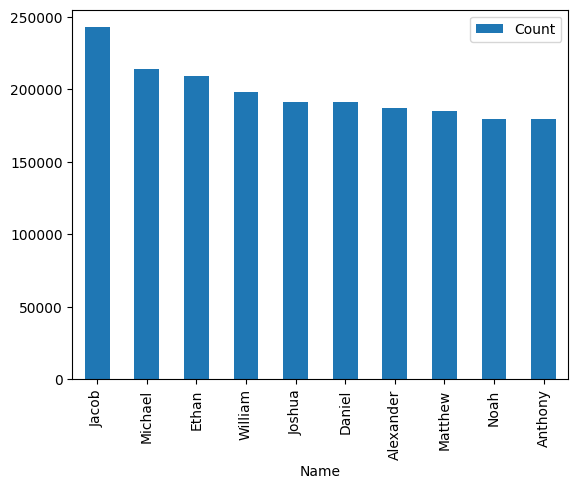

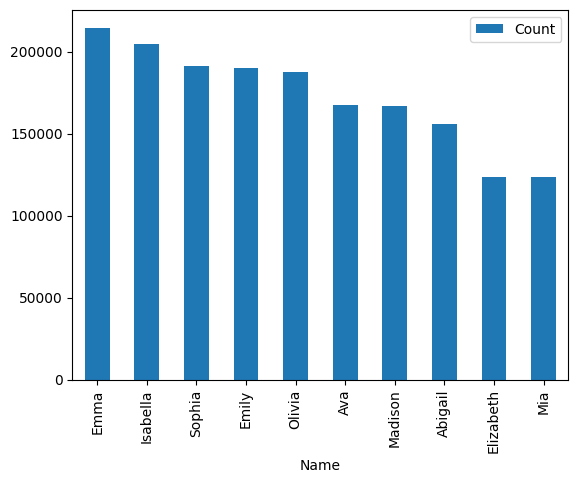

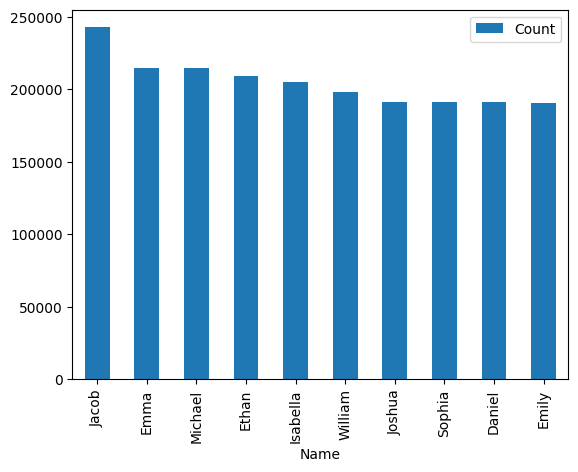

In [10]:
import matplotlib.pyplot as plt

grouped_by_names_male.nlargest(10, 'Count').plot(kind='bar')
print(grouped_by_names_male.nlargest(10, 'Count').index)
plt.show()

grouped_by_names_female.nlargest(10, 'Count').plot(kind='bar')
plt.show()

grouped_by_names.nlargest(10, 'Count').plot(kind='bar')
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [18]:
baby_names['Name'].unique()
# Jest 17632 różnych imion

array(['Emma', 'Madison', 'Hannah', ..., 'Braun', 'Evrett', 'Coalton'],
      dtype=object)

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [26]:
grouped_by_names['Probability'] = grouped_by_names['Count'] / grouped_by_names['Count'].sum()


In [50]:
names = grouped_by_names.iloc[:, []].index.tolist()

In [51]:
print(names)

['Aaban', 'Aadan', 'Aadarsh', 'Aaden', 'Aadhav', 'Aadhya', 'Aadi', 'Aadin', 'Aadit', 'Aaditya', 'Aadya', 'Aadyn', 'Aahan', 'Aahana', 'Aahil', 'Aahna', 'Aaiden', 'Aaima', 'Aakash', 'Aalaya', 'Aalayah', 'Aaleah', 'Aaleyah', 'Aalia', 'Aaliah', 'Aalijah', 'Aaliya', 'Aaliyah', 'Aaliyha', 'Aalyah', 'Aalyiah', 'Aamina', 'Aaminah', 'Aamir', 'Aamira', 'Aamiyah', 'Aanika', 'Aaniya', 'Aaniyah', 'Aanya', 'Aaradhya', 'Aaralyn', 'Aaralynn', 'Aarav', 'Aaren', 'Aaria', 'Aarian', 'Aariana', 'Aaric', 'Aarika', 'Aarin', 'Aarini', 'Aarion', 'Aariv', 'Aariyah', 'Aariz', 'Aarna', 'Aarnav', 'Aarohi', 'Aaron', 'Aaronjames', 'Aarron', 'Aarush', 'Aarushi', 'Aarvi', 'Aarya', 'Aaryan', 'Aaryav', 'Aaryn', 'Aasha', 'Aashi', 'Aashna', 'Aashritha', 'Aashvi', 'Aasia', 'Aasim', 'Aasiyah', 'Aastha', 'Aayan', 'Aayansh', 'Aayat', 'Aayden', 'Aayla', 'Aayush', 'Ab', 'Abagail', 'Abanoub', 'Abba', 'Abbagail', 'Abbas', 'Abbey', 'Abbi', 'Abbie', 'Abbiegail', 'Abbigail', 'Abbigale', 'Abbigayle', 'Abbott', 'Abby', 'Abbygail', 'Ab

In [59]:
import numpy as np
def random_name(n):
    p = grouped_by_names['Probability'].values
    for _ in range(n):
        yield np.random.choice(names, size=1, p=p)[0]

name_generator = random_name(20)

# Pobieranie 20 imion z generatora
for name in name_generator:
    print(name)

Dominic
Matthew
Katelyn
Emily
Aaliyah
Miguel
Andrea
Trinity
Elizabeth
Heaven
Muhammad
David
Tatiana
Layla
Sydney
Jocelyn
Nora
Noelani
Malik
Tyler


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [60]:
print(grouped_by_names.nlargest(1, 'Count'))

        Count  Probability
Name                      
Jacob  242874     0.006857


In [65]:
print(f"Średnia: {grouped_by_names['Count'].mean()}")
print(f"Mediana: {grouped_by_names['Count'].median()}")
print(f"Odchylenie standardowe: {grouped_by_names['Count'].std()}")

Średnia: 2008.932168784029
Mediana: 49.0
Mediana: 11006.06946789057


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.